#### The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. 

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

In [222]:
df = pd.read_csv('/Users/ilianayordanova/Desktop/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### 1. Total generated revenue

In [223]:
total_revenue = df['Total'].sum()
total_revenue_str = str(total_revenue)
print('Total generated revenue: ' + total_revenue_str);

Total generated revenue: 322966.749


### 2. Best month for sales and how much was earned that month

In [224]:
df['Month'] = df['Date'].str.split(pat = '/').str[0]
df['Month'] = df['Month'].astype('int32')
df['Month'].dtype

dtype('int32')

In [225]:
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
monthly_sales

,Month,Total
0,1,116291.868
1,2,97219.374
2,3,109455.507


In [226]:
# Best month for sales and how much was earned that month
best_month = results.sort_values(by = 'Total', ascending = False).head(1)
best_month

,Month,Total
0,1,116291.868


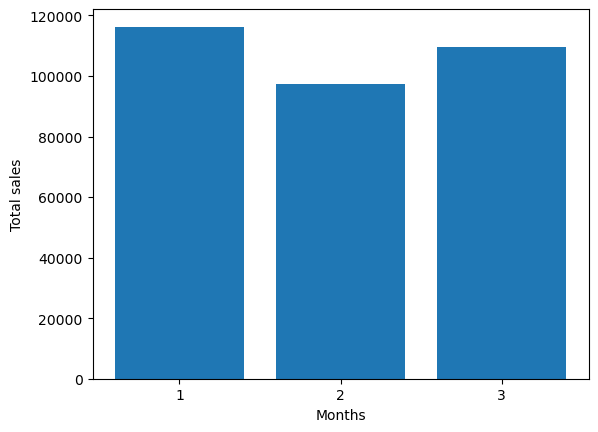

In [227]:
months = range(1,4)
plt.bar(months, results['Total'])
plt.xticks(months)
plt.ylabel('Total sales')
plt.xlabel('Months')
plt.show()

### 3. City with highest number of sales

In [228]:
city_sales = df.groupby('City')['Total'].sum().reset_index()
city_sales

,City,Total
0,Mandalay,106197.6720
1,Naypyitaw,110568.7065
2,Yangon,106200.3705


In [229]:
city_highest_sales = city_sales.sort_values(by='Total', ascending = False).head(1)
city_highest_sales

,City,Total
1,Naypyitaw,110568.7065


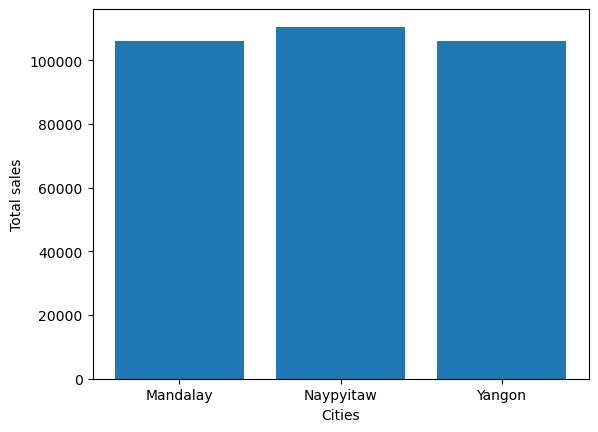

In [230]:
cities = cities_with_highest_sales['City']
plt.bar(cities, cities_with_highest_sales['Total'])
plt.ylabel('Total sales')
plt.xlabel('Cities')
plt.show()

### 4. What time customers are more likely to buy products?

In [231]:
hours = df['Time'].str.split(pat = ':').str[0]
df['Hour'] = hours
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,10


In [232]:
best_time = df.groupby(['Hour']).count().sort_values(by = 'Time', ascending = False).head(2)
best_time

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
Hour,,,,,,,,,,,,,,,,,,
19,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
13,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103


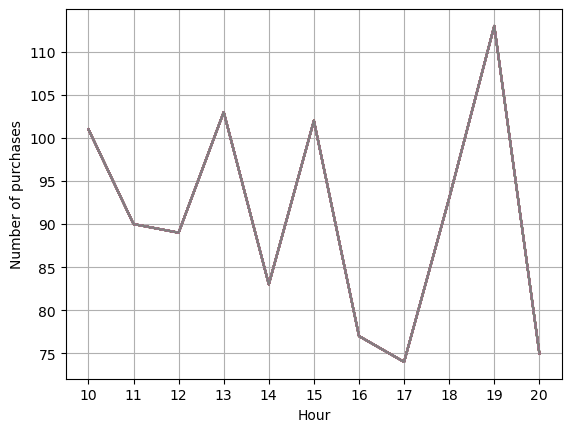

In [234]:
hours = [hour for hour, df2 in df.groupby('Hour')]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Number of purchases')
plt.grid()
plt.show()
#Customers buy products mostly at 13 pm or 19 pm.

### 5. What type of products are sold the most?

In [262]:
product_sales = df.groupby('Product line')['Quantity'].sum().reset_index()
product_sales_sorted = product_sales.sort_values(by = 'Quantity', ascending = False)

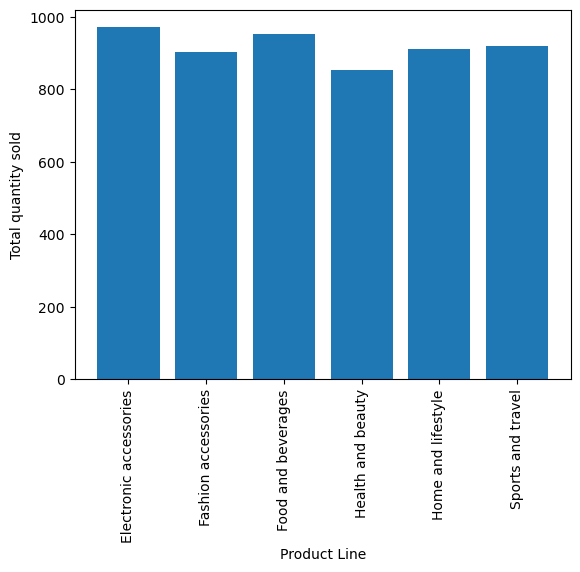

In [263]:
plt.bar(product_sales['Product line'], product_sales['Quantity'])
plt.xticks(product_sales['Product line'], rotation = 'vertical', size = 10)
plt.xlabel('Product Line')
plt.ylabel('Total quantity sold')
plt.show()
#Electronic accessories are sold the most

### Find the average price of products within each product line

In [266]:
average_prices = df.groupby('Product line')['Unit price'].mean().reset_index()
average_prices

#The most sold products are the cheapest

,Product line,Unit price
0,Electronic accessories,53.551588
1,Fashion accessories,57.153652
2,Food and beverages,56.008851
3,Health and beauty,54.854474
4,Home and lifestyle,55.316937
5,Sports and travel,56.993253


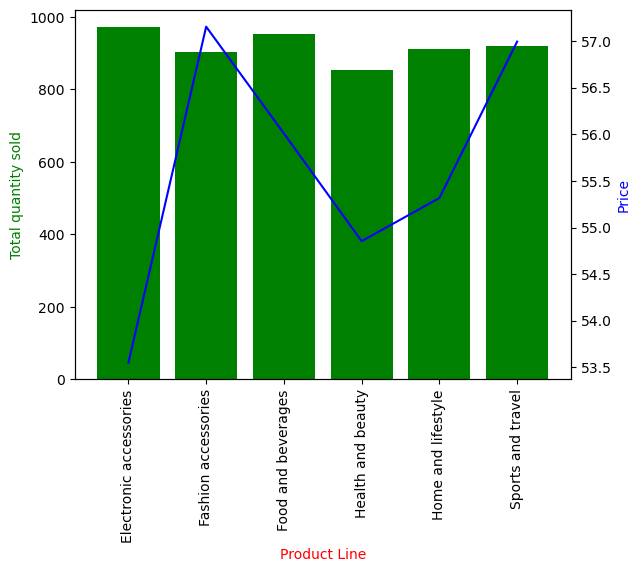

In [265]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_sales['Product line'], product_sales['Quantity'], color = 'g')
ax2.plot(product_sales['Product line'], average_prices['Unit price'], 'b-')
ax1.set_xlabel('Product Line', color = 'r')
ax1.set_ylabel('Total quantity sold', color = 'g')
ax2.set_ylabel('Price', color = 'b')
ax1.set_xticks(range(len(product_sales['Product line'])))
ax1.set_xticklabels(product_sales['Product line'], rotation = 'vertical', size = 10)
plt.show()